<a href="https://colab.research.google.com/github/Elakkiyasivadevan/Machine-Learning-Tasks/blob/main/LAB/ML_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [ ]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data=pd.read_csv('diabetes.csv', header=None, names=col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [ ]:
feature_cols=['pregnant','glucose','bp','insulin','bmi','pedigree','age']
x=data[feature_cols].iloc[1:].astype(float)
y=data.label.iloc[1:].astype(float)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(537, 7)

(537,)

(231, 7)

(231,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
model=SVC(kernel='rbf',random_state=0)
model.fit(x_train,y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction:',svc_prediction)

svc_prediction: [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]


In [ ]:
conf_mat=metrics.confusion_matrix(y_test,svc_prediction)
print('SVC[kernel-rbf]')
print('Confusion Matric:\n',conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,svc_prediction)
print('Accuracy Score:',Accuracy_score)
print('Accuracy in Percentage:',int(Accuracy_score*100),'%')
print(classification_report(y_test,svc_prediction))

SVC[kernel-rbf]
Confusion Matric:
 [[135  25]
 [ 22  49]]
Accuracy Score: 0.7965367965367965
Accuracy in Percentage: 79 %
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       160
         1.0       0.66      0.69      0.68        71

    accuracy                           0.80       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.80      0.80      0.80       231



svc_prediction: [0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.]


[Text(0.5, 1.0, 'SVC[rbf]')]

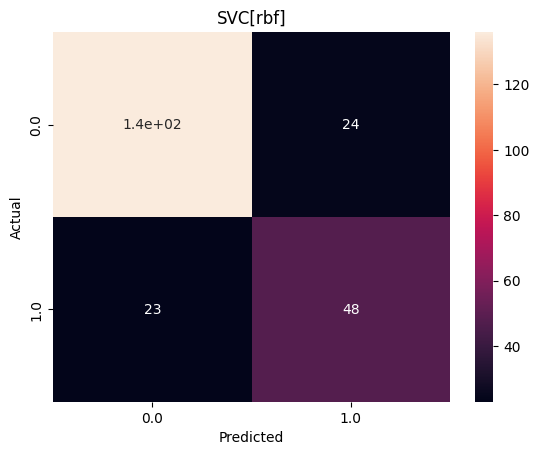

In [ ]:
model=SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction:',svc_prediction)
conf_mat=pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC[rbf]')

1. Generate a random dataset that follows a quadratic pattern and classify it using SVM.

(200, 2)


,x,label
0,-2.780068,0
1,3.707323,1
2,-2.932808,1
3,4.186109,1
4,-0.115888,0


(140, 1)

(140,)

(60, 1)

(60,)

svc_prediction: [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.]
SVC [kernel=rbf]
Confusion Matrix:
 [[31  0]
 [ 6 23]]
Accuracy Score: 0.9
Accuracy in Percentage: 90 %
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        31
         1.0       1.00      0.79      0.88        29

    accuracy                           0.90        60
   macro avg       0.92      0.90      0.90        60
weighted avg       0.92      0.90      0.90        60

Linear Kernel Prediction: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


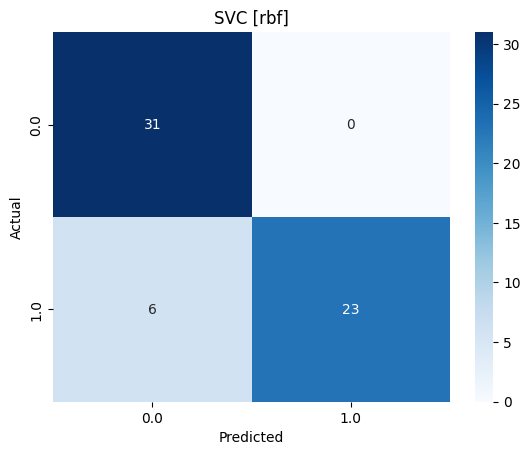

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed(5)
X = np.random.uniform(-5, 5, (200, 1))
y = (X[:,0]**2 + np.random.randn(200)*2 > 10).astype(int)

data = pd.DataFrame({'x': X[:,0], 'label': y})
print(data.shape)
display(data.head())

feature_cols = ['x']
x = data[feature_cols].astype(float)
y = data['label'].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = SVC(kernel='rbf', random_state=0)
model.fit(x_train, y_train)

svc_prediction = model.predict(x_test)
print('svc_prediction:', svc_prediction)

conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernel=rbf]')
print('Confusion Matrix:\n', conf_mat)

Accuracy_score = metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score*100), '%')
print(classification_report(y_test, svc_prediction))

model_linear = SVC(kernel='linear', random_state=0)
model_linear.fit(x_train, y_train)

svc_prediction_linear = model_linear.predict(x_test)
print('Linear Kernel Prediction:', svc_prediction_linear)

conf_mat_df = pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, cmap="Blues").set(title='SVC [rbf]')
plt.show()


2. Using SVM, a company wants to classify emails as spam and not spam based on features such as word frequency and message length

(500, 3)
   word_freq  msg_length  label
0  37.454012         456      0
1  95.071431         154      1
2  73.199394         210      0
3  59.865848         426      0
4  15.601864         221      0
(350, 2) (350,) (150, 2) (150,)
svc_prediction: [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
SVC[kernel-rbf]
Confusion Matrix:
 [[115   0]
 [  0  35]]
Accuracy Score: 1.0
Accuracy in Percentage: 100 %
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       115
         1.0       1.00      1.00      1.00        35

    accuracy         

[Text(0.5, 1.0, 'SVC[rbf]')]

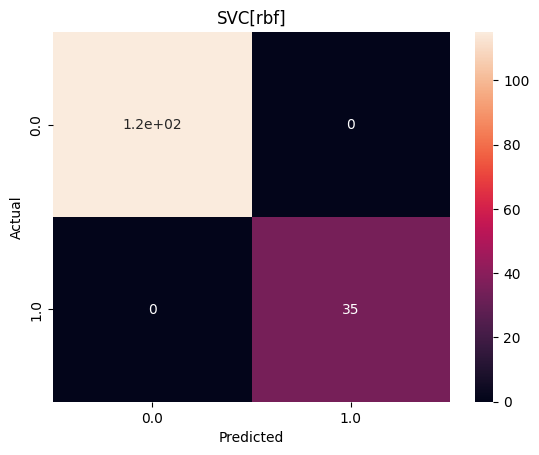

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

# Generate a random dataset for spam classification
np.random.seed(42)
n_samples = 500
word_freq = np.random.rand(n_samples) * 100   # word frequency feature
msg_length = np.random.randint(10, 500, n_samples)  # message length feature

# Label: 1 = spam, 0 = not spam (rule: if word_freq high & length short → spam)
labels = ((word_freq > 50) & (msg_length < 200)).astype(int)

data = pd.DataFrame({
    'word_freq': word_freq,
    'msg_length': msg_length,
    'label': labels
})

print(data.shape)
print(data.head())


feature_cols = ['word_freq', 'msg_length']
x = data[feature_cols].astype(float)
y = data.label.astype(float)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model = SVC(kernel='rbf', random_state=0)
model.fit(x_train, y_train)


svc_prediction = model.predict(x_test)
print('svc_prediction:', svc_prediction)

conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC[kernel-rbf]')
print('Confusion Matrix:\n', conf_mat)


Accuracy_score = metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score * 100), '%')
print(classification_report(y_test, svc_prediction))

conf_mat = pd.crosstab(y_test, svc_prediction, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC[rbf]')
